Identifying missing values in the dataset

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

Display header rows of the dataset, will be useful to  refer while preproccessing

In [7]:
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
print("The missing values in the dataset are:")
print(df.isnull().sum())

The missing values in the dataset are:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [9]:
df.fillna({'Cuisines': df['Cuisines'].mode()[0]}, inplace=True)

In [10]:
binary_features = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in binary_features:
  df[col] = df[col].map({'Yes':1 , 'No':0})

In [11]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229


In [12]:
numerical_features = ['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Votes']
categorical_features = ['City', 'Cuisines', 'Currency','Rating color', 'Rating text']

Pipelines

In [14]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
catergorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', catergorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [16]:
#Seperate features x qand traget y
X = df.drop(['Aggregate rating', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose'], axis=1)
y = df['Aggregate rating'] #Our target variable

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training the training dataset on linear regression algorithm

In [19]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [20]:
print("Starting training the training dataset on linear regression algorithm")
model_pipeline.fit(X_train, y_train)
print("Finished training the training dataset on linear regression algorithm")

Starting training the training dataset on linear regression algorithm
Finished training the training dataset on linear regression algorithm


In [21]:
print("Starting prediction making on Test data")
y_pred = model_pipeline.predict(X_test)
print("Finished prediction making on Test data")

Starting prediction making on Test data
Finished prediction making on Test data


In [23]:
print("\n Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(y_test, y_pred)))


 Regression Metrics:
Mean Squared Error: 2.0626690283403017
R-squared: 0.08654740100004377
Mean Absolute Error 1.1632658048164828
Root Mean Squared Error 1.4361995085433994


In [42]:
preprocessor = model_pipeline.named_steps['preprocessor']
num_features = numerical_features
cat_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
passthrough_features = preprocessor.transformers_[2][2]
feature_names = np.concatenate([num_features, cat_features, passthrough_features])
regressor = model_pipeline.named_steps['regressor']
coefficients = regressor.coef_
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
print(feature_importance.head(10).to_markdown(index=False))

| Feature               |   Coefficient |   Abs_Coefficient |
|:----------------------|--------------:|------------------:|
| 0                     |  -5.79964e-08 |       5.79964e-08 |
| Price range           |   8.61385e-15 |       8.61385e-15 |
| Rating text_Not rated |  -7.80205e-15 |       7.80205e-15 |
| Rating color_White    |  -7.80205e-15 |       7.80205e-15 |
| Votes                 |   6.24964e-15 |       6.24964e-15 |
| Country Code          |   5.56752e-15 |       5.56752e-15 |
| Has Online delivery   |   4.44241e-15 |       4.44241e-15 |
| Has Table booking     |   3.78358e-15 |       3.78358e-15 |
| Rating text_Good      |   2.90424e-15 |       2.90424e-15 |
| Rating color_Yellow   |   2.90424e-15 |       2.90424e-15 |


In [44]:
print("\nRefined Interpretation of Top 10 Most Influential Features:")
for idx, row in feature_importance.head(10).iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    interpretation = f"{idx+1}) Feature \"{feature}\":"
    feature_str = str(feature)
    if 'Rating text' in feature_str or 'Rating color' in feature_str:
        sentiment = "positive" if coef > 0 else "negative"
        if sentiment == "positive":
            interpretation += f" has a strong {sentiment} correlation with higher restaurant ratings. Restaurants should focus on improving customer experience to achieve better ratings like '{feature_str.split('_')[-1]}'."
        else:
            interpretation += f" has a strong {sentiment} correlation with lower restaurant ratings. Restaurants should identify and address the issues leading to '{feature_str.split('_')[-1]}' ratings."
    elif feature_str == 'Votes':
        interpretation += f" has a positive impact on restaurant ratings. More votes generally indicate popularity and customer engagement, which correlates with higher ratings. Encourage customers to leave reviews and ratings."
    elif feature_str == 'Price range':
         interpretation += f" has a positive impact on restaurant ratings. This suggests that, within the dataset, higher-priced restaurants tend to have higher ratings. This could be due to factors like better quality, service, or ambiance associated with higher prices."
    elif feature_str == 'Has Online delivery':
        interpretation += f" has a positive impact on restaurant ratings. Offering online delivery seems to be associated with higher ratings, likely due to increased convenience for customers."
    elif feature_str == 'Has Table booking':
        interpretation += f" has a positive impact on restaurant ratings. Providing table booking options appears to correlate with higher ratings, possibly indicating better planning and service."
    elif feature_str == 'Country Code':
         interpretation += f" has a positive impact on restaurant ratings. This suggests that restaurants in certain countries within the dataset tend to have higher ratings. This could be due to various regional factors, but it's difficult to provide specific actionable advice based solely on the country code."
    elif feature_str == '0':
        interpretation += f" has a negative impact on the restaurant ratings. This feature likely represents the Restaurant ID after preprocessing. As Restaurant ID is just an identifier, its coefficient having a high absolute value suggests that there might be an issue with how this feature was handled in the preprocessing step or it might be capturing some underlying pattern related to restaurant identity that influences ratings, which is not directly actionable."
    else:
        sentiment = "positive" if coef > 0 else "negative"
        interpretation += f" has a {sentiment} impact on restaurant ratings."
    print(interpretation)


Refined Interpretation of Top 10 Most Influential Features:
1634) Feature "0": has a negative impact on the restaurant ratings. This feature likely represents the Restaurant ID after preprocessing. As Restaurant ID is just an identifier, its coefficient having a high absolute value suggests that there might be an issue with how this feature was handled in the preprocessing step or it might be capturing some underlying pattern related to restaurant identity that influences ratings, which is not directly actionable.
9) Feature "Price range": has a positive impact on restaurant ratings. This suggests that, within the dataset, higher-priced restaurants tend to have higher ratings. This could be due to factors like better quality, service, or ambiance associated with higher prices.
1631) Feature "Rating text_Not rated": has a strong negative correlation with lower restaurant ratings. Restaurants should identify and address the issues leading to 'Not rated' ratings.
1626) Feature "Rating co

Visualizing potential interactions between numerical features:


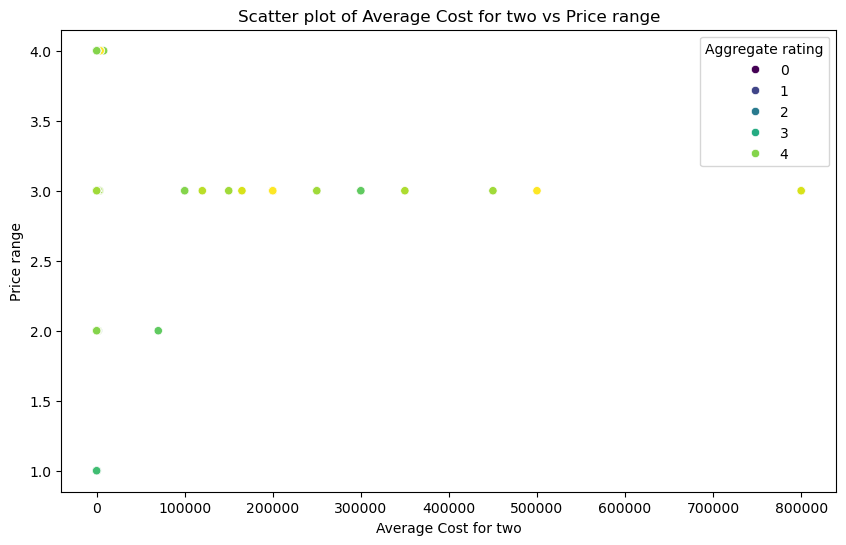

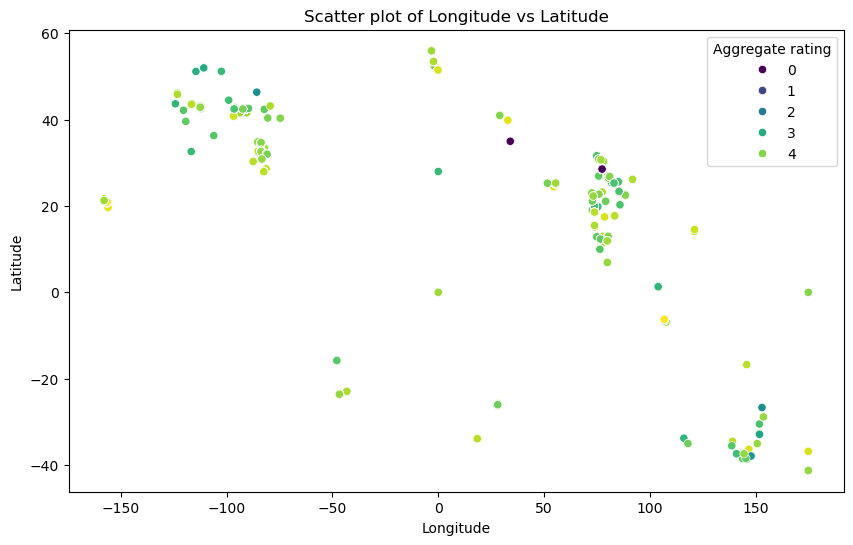


Visualizing potential interactions between categorical features:


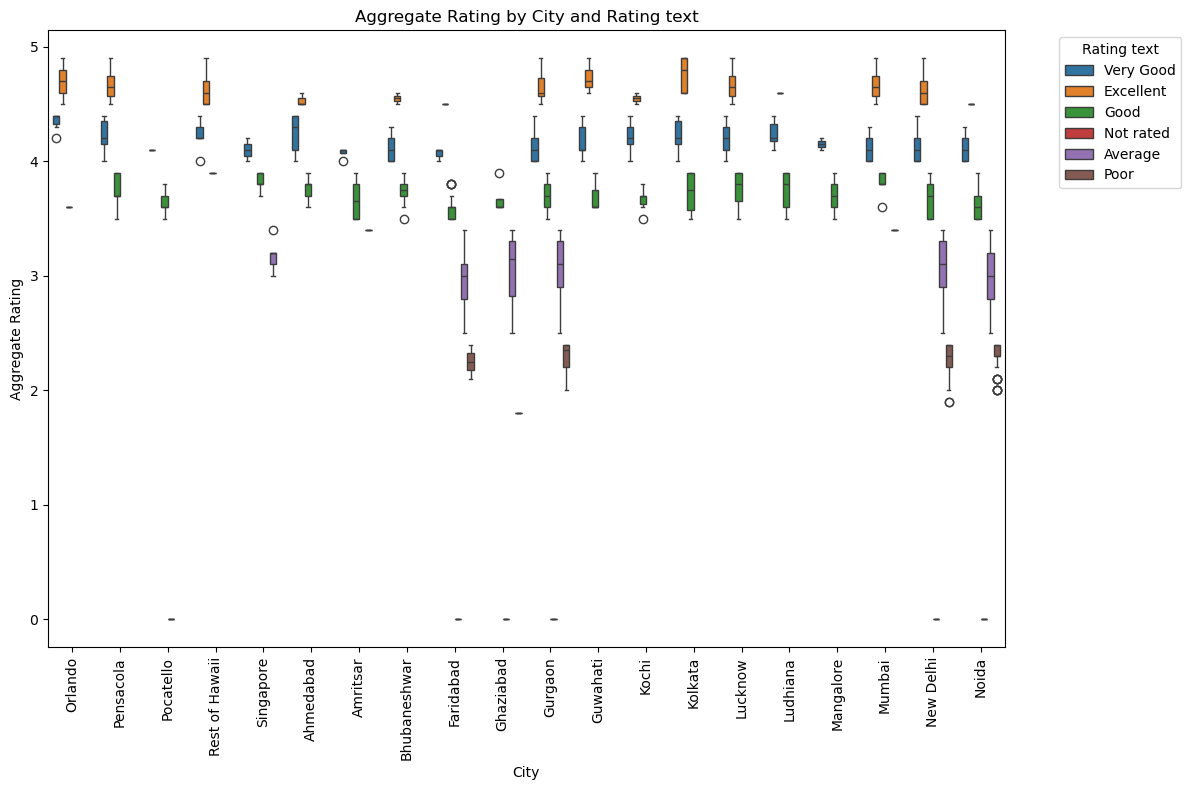

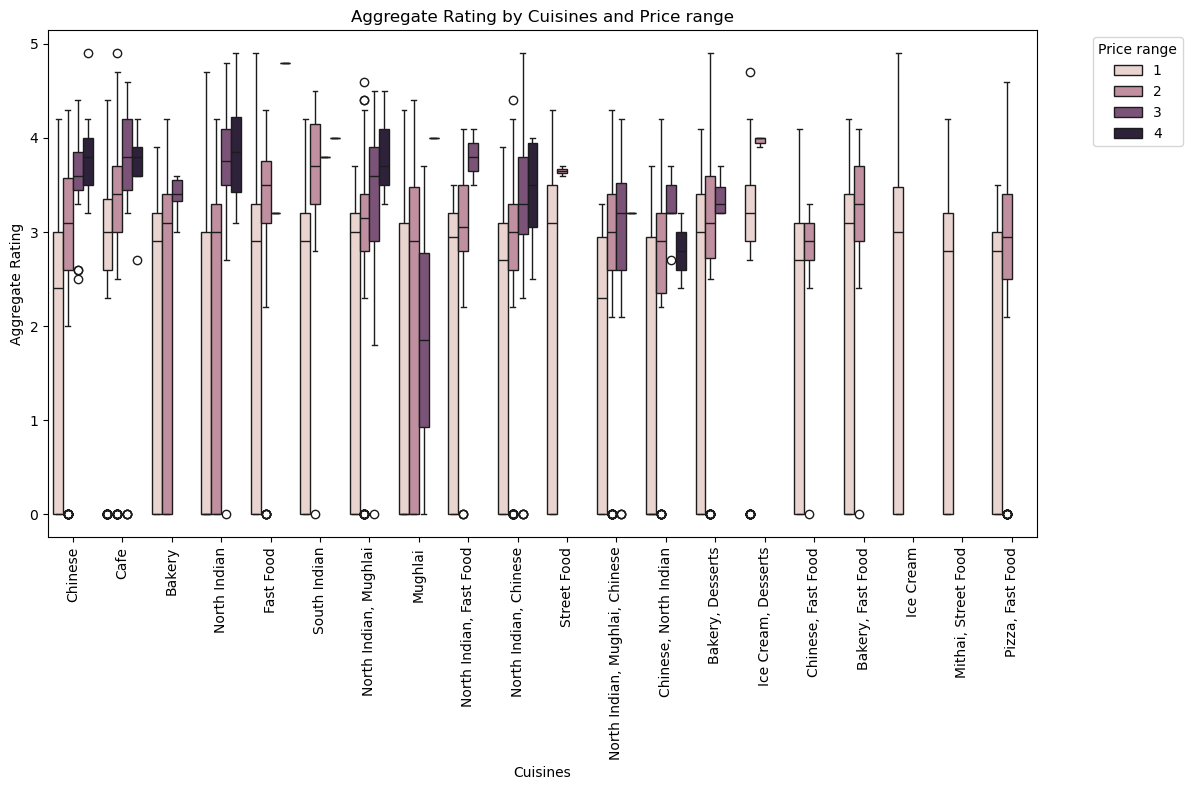

In [56]:
numerical_interaction_pairs = [('Average Cost for two', 'Price range'), ('Longitude', 'Latitude')]
print("Visualizing potential interactions between numerical features:")
for col1, col2 in numerical_interaction_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2, hue='Aggregate rating', palette='viridis')
    plt.title(f'Scatter plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
categorical_interaction_pairs = [('City', 'Rating text'), ('Cuisines', 'Price range')]
print("\nVisualizing potential interactions between categorical features:")
for col1, col2 in categorical_interaction_pairs:
    if df[col1].nunique() > 20: 
        top_categories = df[col1].value_counts().nlargest(20).index
        filtered_df = df[df[col1].isin(top_categories)].copy()
    else:
        filtered_df = df.copy()
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=filtered_df, x=col1, y='Aggregate rating', hue=col2)
    plt.title(f'Aggregate Rating by {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel('Aggregate Rating')
    plt.xticks(rotation=90)
    plt.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [58]:
# Documenting observed interactions
print("\nObservations from Interaction Visualizations:")
print("\nNumerical Interaction Pair: Average Cost for two vs Price range")
print("Observation: There is a clear positive correlation between Average Cost for two and Price range, which is expected as Price range is likely derived from cost. The scatter plot shows clusters of ratings within different price ranges, suggesting that while related, both might contribute uniquely or interact to influence ratings.")
print("\nNumerical Interaction Pair: Longitude vs Latitude")
print("Observation: The scatter plot of Longitude and Latitude shows geographical clustering of restaurants. The Aggregate Rating is also clustered geographically, indicating that location has a strong influence on ratings. While not a direct feature interaction in the multiplicative sense, the spatial relationship and its impact on rating is evident.")
print("\nCategorical Interaction Pair: City vs Rating text")
print("Observation: The box plot shows that the distribution of 'Rating text' varies significantly across different cities. Certain cities have a higher proportion of 'Excellent' or 'Very Good' ratings, while others have more 'Average' or 'Poor' ratings. This indicates a strong interaction between City and Rating text, suggesting that the city where a restaurant is located heavily influences the rating text distribution.")
print("\nCategorical Interaction Pair: Cuisines vs Price range")
print("Observation: The box plot shows that the distribution of 'Aggregate rating' varies across different Cuisines within different Price ranges. Some cuisines consistently have higher ratings across price ranges, while others show more variability or lower ratings. This suggests that the combination of Cuisine and Price range influences the Aggregate rating.")
print("\nPotential Interaction Features for Future Modeling:")
print("- Interaction term between 'Average Cost for two' and 'Price range' (e.g., multiplication or a combined feature).")
print("- Interaction terms or one-hot encoded combinations for significant City and Cuisines pairs observed in the categorical analysis.")
print("- Consideration of geographical features derived from Longitude and Latitude, or spatial interaction terms, to capture location-based influences.")
# Note: Actual creation and inclusion of these interaction features will be done in a later step if deemed beneficial.


Observations from Interaction Visualizations:

Numerical Interaction Pair: Average Cost for two vs Price range
Observation: There is a clear positive correlation between Average Cost for two and Price range, which is expected as Price range is likely derived from cost. The scatter plot shows clusters of ratings within different price ranges, suggesting that while related, both might contribute uniquely or interact to influence ratings.

Numerical Interaction Pair: Longitude vs Latitude
Observation: The scatter plot of Longitude and Latitude shows geographical clustering of restaurants. The Aggregate Rating is also clustered geographically, indicating that location has a strong influence on ratings. While not a direct feature interaction in the multiplicative sense, the spatial relationship and its impact on rating is evident.

Categorical Interaction Pair: City vs Rating text
Observation: The box plot shows that the distribution of 'Rating text' varies significantly across different c